In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cowpea = pd.read_excel('../data/prepared.xlsx', sheet_name='Cowpea')    ; cowpea['crop']   = 'cowpea'
maize = pd.read_excel('../data/prepared.xlsx', sheet_name='Maize')      ; maize['crop']    = 'maize'
rice = pd.read_excel('../data/prepared.xlsx', sheet_name='Rice')        ; rice['crop']     = 'rice'
chickpea = pd.read_excel('../data/prepared.xlsx', sheet_name='Chickpea'); chickpea['crop'] = 'chickpea'
mustard = pd.read_excel('../data/prepared.xlsx', sheet_name='Mustard')  ; mustard['crop']  = 'mustard'

In [3]:
data = pd.concat([cowpea, rice, maize, chickpea, mustard], axis=0).reset_index(drop=True)

In [4]:
data.loc[:, 'Time'] = data.loc[:, 'Time'].apply(lambda x: x.hour)
data.loc[:, 'timesin'] = np.sin(data.loc[:, 'Time'] * (2 * np.pi) / 12)
data.loc[:, 'timecos'] = np.cos(data.loc[:, 'Time'] * (2 * np.pi) / 12)

In [5]:
df = pd.get_dummies(data[['crop']])
data = pd.concat([df, data], axis=1)

In [6]:
data.columns

Index(['crop_chickpea', 'crop_cowpea', 'crop_maize', 'crop_mustard',
       'crop_rice', 'Date', 'Time', 'GSR', 'CT', 'Rn', 'crop', 'ST_5cm',
       'ST_10cm', 'ST_15cm', 'timesin', 'timecos'],
      dtype='object')

<AxesSubplot:xlabel='GSR', ylabel='Rn'>

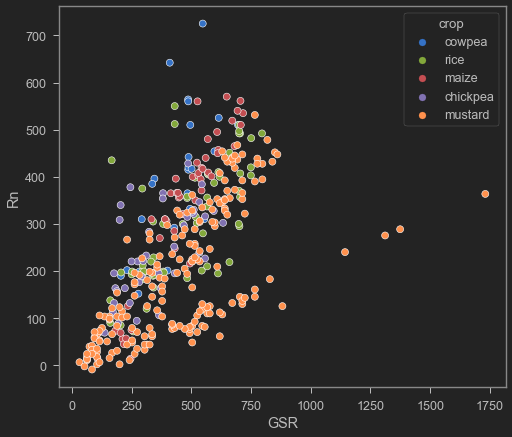

In [9]:
sns.scatterplot(x='GSR', y='Rn', data=data, hue='crop')